## IMPORTS

In [1]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
from sklearn.model_selection import RandomizedSearchCV, cross_validate, train_test_split

## EDA

In [2]:
#import data

In [3]:
#visualize different parameters

## ML-analysis (code)

In [4]:
#Import data
data = pd.read_csv('data/raw/pretransformed_heart_disease.csv')
data.head()

,Age (in years),Sex,Chest pain type,Resting blood pressure (in mm Hg on admission to the hospital),Serum cholesterol (in mg/dl),Fasting blood sugar > 120 mg/dl,Resting electrocardiographic results,Maximum heart rate achieved,Exercise-induced angina,ST depression induced by exercise relative to rest,Slope of the peak exercise ST segment,Number of major vessels (0–3) colored by fluoroscopy,Thalassemia,Diagnosis of heart disease
0,63,male,typical angina,145,233,True,showing probable or definite left ventricular ...,150,no,2.3,downsloping,0.0,fixed defect,< 50% diameter narrowing
1,67,male,asymptomatic,120,229,False,showing probable or definite left ventricular ...,129,yes,2.6,flat,2.0,reversable defect,> 50% diameter narrowing
2,37,male,non-anginal pain,130,250,False,normal,187,no,3.5,downsloping,0.0,normal,< 50% diameter narrowing
3,41,female,atypical angina,130,204,False,showing probable or definite left ventricular ...,172,no,1.4,upsloping,0.0,normal,< 50% diameter narrowing
4,56,male,atypical angina,120,236,False,normal,178,no,0.8,upsloping,0.0,normal,< 50% diameter narrowing


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 14 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Age (in years)                                                  219 non-null    int64  
 1   Sex                                                             219 non-null    object 
 2   Chest pain type                                                 219 non-null    object 
 3   Resting blood pressure (in mm Hg on admission to the hospital)  219 non-null    int64  
 4   Serum cholesterol (in mg/dl)                                    219 non-null    int64  
 5   Fasting blood sugar > 120 mg/dl                                 219 non-null    bool   
 6   Resting electrocardiographic results                            219 non-null    object 
 7   Maximum heart rate achieved                          

In [6]:
data.describe()

,Age (in years),Resting blood pressure (in mm Hg on admission to the hospital),Serum cholesterol (in mg/dl),Maximum heart rate achieved,ST depression induced by exercise relative to rest,Number of major vessels (0–3) colored by fluoroscopy
count,219.000000,219.000000,219.00000,219.000000,219.000000,215.000000
mean,53.287671,130.255708,244.26484,155.251142,0.691781,0.390698
std,9.218767,16.729593,50.55602,20.836100,0.857041,0.727245
min,29.000000,94.000000,126.00000,88.000000,0.000000,0.000000
25%,46.000000,120.000000,211.00000,144.000000,0.000000,0.000000
50%,54.000000,130.000000,239.00000,159.000000,0.400000,0.000000
75%,60.000000,140.000000,269.00000,170.500000,1.200000,1.000000
max,76.000000,192.000000,564.00000,202.000000,4.200000,3.000000


In [7]:
# Transform target column to True/False with new label of 
# '> 50% diameter narrowing'

data['Diagnosis of heart disease'] = data['Diagnosis of heart disease'].replace({'< 50% diameter narrowing': False, '> 50% diameter narrowing': True})
data.rename(columns={'Diagnosis of heart disease': '> 50% diameter narrowing'}, inplace=True)
data.head()

C:\Users\nguye\AppData\Local\Temp\ipykernel_33316\948054868.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Diagnosis of heart disease'] = data['Diagnosis of heart disease'].replace({'< 50% diameter narrowing': False, '> 50% diameter narrowing': True})


,Age (in years),Sex,Chest pain type,Resting blood pressure (in mm Hg on admission to the hospital),Serum cholesterol (in mg/dl),Fasting blood sugar > 120 mg/dl,Resting electrocardiographic results,Maximum heart rate achieved,Exercise-induced angina,ST depression induced by exercise relative to rest,Slope of the peak exercise ST segment,Number of major vessels (0–3) colored by fluoroscopy,Thalassemia,> 50% diameter narrowing
0,63,male,typical angina,145,233,True,showing probable or definite left ventricular ...,150,no,2.3,downsloping,0.0,fixed defect,False
1,67,male,asymptomatic,120,229,False,showing probable or definite left ventricular ...,129,yes,2.6,flat,2.0,reversable defect,True
2,37,male,non-anginal pain,130,250,False,normal,187,no,3.5,downsloping,0.0,normal,False
3,41,female,atypical angina,130,204,False,showing probable or definite left ventricular ...,172,no,1.4,upsloping,0.0,normal,False
4,56,male,atypical angina,120,236,False,normal,178,no,0.8,upsloping,0.0,normal,False


In [8]:
train_df, test_df = train_test_split(data, test_size=0.1)

X_train = train_df.drop('> 50% diameter narrowing', axis=1)
y_train = train_df['> 50% diameter narrowing']
X_test = test_df.drop('> 50% diameter narrowing', axis=1)
y_test = test_df['> 50% diameter narrowing']

In [9]:
# Lists of feature names
categorical_features = ['Sex', 
                        'Chest pain type', 
                        'Fasting blood sugar > 120 mg/dl', 
                        'Resting electrocardiographic results', 
                        'Exercise-induced angina', 
                        'Slope of the peak exercise ST segment', 
                        'Thalassemia']
numeric_features = list(set(X_train.columns) - set(categorical_features))

# Create transformer pipeline
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", drop='if_binary', dtype=int, sparse_output=False),
)

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="median", fill_value="missing"),
    StandardScaler(),
)

# Create the column transformer
preprocessor = make_column_transformer(
    (categorical_transformer, categorical_features),
    (numeric_transformer, numeric_features),
)
# Show the preprocessor
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                dtype=<class 'int'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Chest pain type',
                                  'Fasting blood sugar > 120 mg/dl',
                                  'Resting electrocardiographic results',
                                  'Exer...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Maximum heart rate achieved',
                                  'ST depression induced by exercise relative '
                                  'to rest',
                                  'Number of major vessels (0–3) colored by '
                                  'fluoroscopy',
                                  'Age (in years)',
                                  'Serum cholesterol (in mg/dl)',
                                  'Resting blood pressure (in mm Hg on '
                                  'admission to the hospital)'])])

In [10]:
# 0. Dummy model
# Imports
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (make_scorer, 
                            precision_score,
                            recall_score,
                            f1_score)

classification_metrics = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, pos_label=True),
    "recall": make_scorer(recall_score, pos_label=True),
    "f1": make_scorer(f1_score, pos_label=True),
}

# The dummy model
dc = make_pipeline(preprocessor, DummyClassifier())
# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results = {}
cross_val_results['dummy'] = pd.DataFrame(cross_validate(dc, 
                                                         X_train, 
                                                         y_train, 
                                                         cv=5, 
                                                         scoring=classification_metrics,
                                                         )).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['dummy']

C:\Users\nguye\miniforge3\envs\573\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nguye\miniforge3\envs\573\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nguye\miniforge3\envs\573\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nguye\miniforge3\envs\573

,mean,std
fit_time,0.014,0.002
score_time,0.016,0.004
test_accuracy,0.741,0.009
test_precision,0.000,0.000
test_recall,0.000,0.000
test_f1,0.000,0.000


In [11]:
# 1. Logistic Regression model

# The logreg model pipeline
logreg = make_pipeline(preprocessor, LogisticRegression(random_state=123, max_iter=1000))

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['logreg'] = pd.DataFrame(cross_validate(logreg, 
                                                          X_train, 
                                                          y_train, 
                                                          cv=5, 
                                                          scoring=classification_metrics, 
                                                          return_train_score=True)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['logreg'] 

C:\Users\nguye\miniforge3\envs\573\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,mean,std
fit_time,0.018,0.004
score_time,0.009,0.007
test_accuracy,0.802,0.049
train_accuracy,0.843,0.015
test_precision,0.687,0.188
train_precision,0.770,0.030
test_recall,0.453,0.171
train_recall,0.559,0.064
test_f1,0.531,0.156
train_f1,0.646,0.047


In [12]:
# 2. Support vector classifier
# Imports
from sklearn.svm import SVC

# The svc model pipeline
svc = make_pipeline(preprocessor, SVC(random_state=123))

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['svc'] = pd.DataFrame(cross_validate(logreg, 
                                                      X_train, 
                                                      y_train, 
                                                      cv=5, 
                                                      scoring=classification_metrics, 
                                                      return_train_score=True)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['svc'] 

C:\Users\nguye\miniforge3\envs\573\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,mean,std
fit_time,0.030,0.026
score_time,0.016,0.004
test_accuracy,0.802,0.049
train_accuracy,0.843,0.015
test_precision,0.687,0.188
train_precision,0.770,0.030
test_recall,0.453,0.171
train_recall,0.559,0.064
test_f1,0.531,0.156
train_f1,0.646,0.047


C:\Users\nguye\miniforge3\envs\573\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


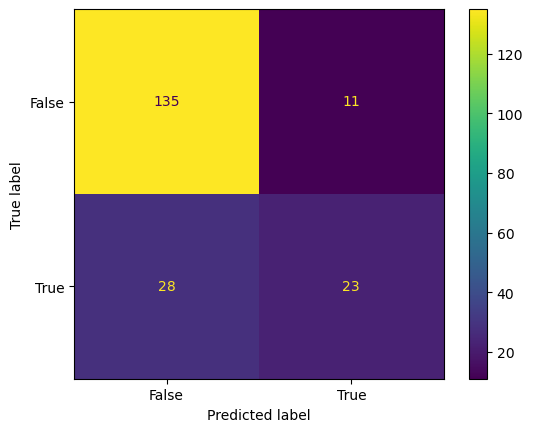

In [13]:
# 3. Confusion matrix for the logistic regression
# Imports
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

confmat_logreg = ConfusionMatrixDisplay.from_predictions(
    y_train,
    cross_val_predict(logreg, X_train, y_train),
    values_format='d'
)
# Show the matrix
confmat_logreg

C:\Users\nguye\miniforge3\envs\573\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


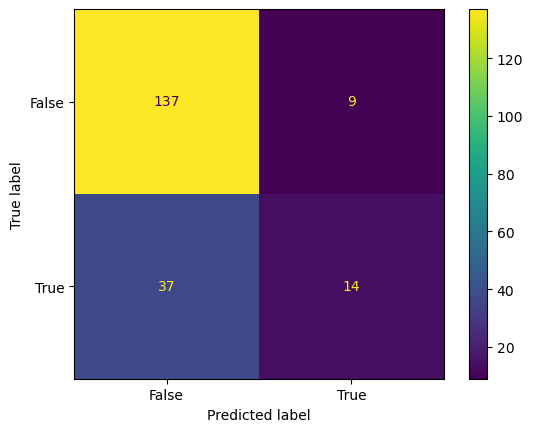

In [14]:
# 3. Confusion matrix for the SVC
confmat_svc = ConfusionMatrixDisplay.from_predictions(
    y_train,
    cross_val_predict(svc, X_train, y_train),
    values_format='d',
)
# Show the matrix
confmat_svc

In [15]:
# 4. Balanced logistic regression
# The logreg model pipeline
logreg_bal = make_pipeline(preprocessor, LogisticRegression(random_state=123, max_iter=1000, class_weight="balanced"))

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['logreg_bal'] = pd.DataFrame(cross_validate(logreg_bal, 
                                                        X_train, 
                                                        y_train, 
                                                        cv=5, 
                                                        scoring=classification_metrics, 
                                                        return_train_score=True)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['logreg_bal'] 

C:\Users\nguye\miniforge3\envs\573\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,mean,std
fit_time,0.019,0.002
score_time,0.014,0.001
test_accuracy,0.706,0.053
train_accuracy,0.816,0.010
test_precision,0.447,0.080
train_precision,0.607,0.022
test_recall,0.605,0.178
train_recall,0.829,0.048
test_f1,0.508,0.117
train_f1,0.700,0.016


In [16]:
# 5. Balanced support vector classifier
# The svc model pipeline
svc_bal = make_pipeline(preprocessor, SVC(random_state=123, class_weight="balanced"))

# The mean and std of the cross validated scores for all metrics as a dataframe
cross_val_results['svc_bal'] = pd.DataFrame(cross_validate(svc_bal, 
                                                          X_train, 
                                                          y_train, 
                                                          cv=5, 
                                                          scoring=classification_metrics, 
                                                          return_train_score=True)).agg(['mean', 'std']).round(3).T

# Show the train and validation scores
cross_val_results['svc_bal'] 

C:\Users\nguye\miniforge3\envs\573\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,mean,std
fit_time,0.016,0.003
score_time,0.015,0.002
test_accuracy,0.726,0.050
train_accuracy,0.919,0.014
test_precision,0.480,0.075
train_precision,0.781,0.039
test_recall,0.569,0.164
train_recall,0.956,0.011
test_f1,0.511,0.098
train_f1,0.859,0.021


C:\Users\nguye\miniforge3\envs\573\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


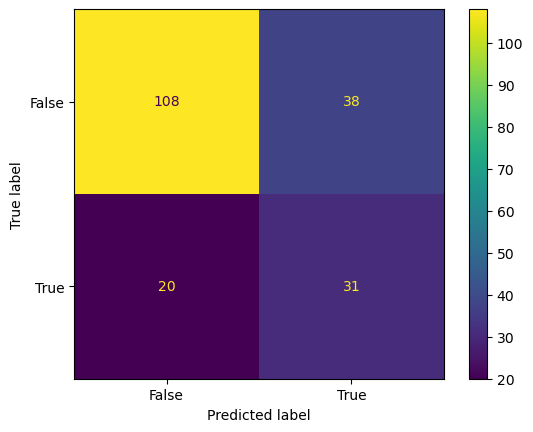

In [17]:
# 6. Confusion matrix for the balanced logistic regression

confmat_logreg_bal = ConfusionMatrixDisplay.from_predictions(
    y_train,
    cross_val_predict(logreg_bal, X_train, y_train),
    values_format='d'
)
# Show the matrix
confmat_logreg_bal

C:\Users\nguye\miniforge3\envs\573\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


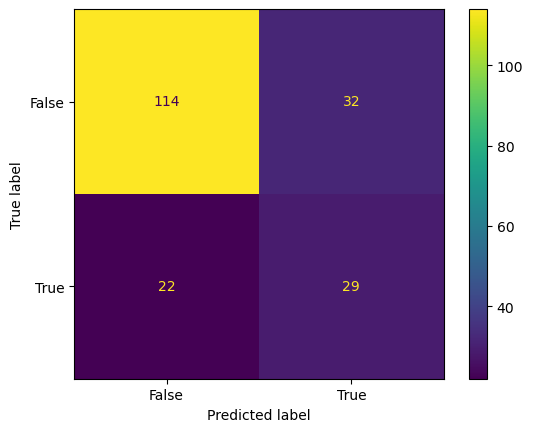

In [18]:
# 6. Confusion matrix for the balanced SVC
confmat_svc_bal = ConfusionMatrixDisplay.from_predictions(
    y_train,
    cross_val_predict(svc_bal, X_train, y_train),
    values_format='d'
)
# Show the matrix
confmat_svc_bal

In [19]:
# Manual check that the cross val std doesn't look way off for some model
pd.concat(
    cross_val_results,
    axis='columns'  # Get the right model names and mean/std as columns
).xs(
    'std',  # Select only the 'std' columns
    axis='columns',  # Cross-section the columns
    level=1  # The 1st level ('mean', 'std') instead of the 0th level (the model names)
).style.format(
    precision=2  # Pandas `.style` does not honor previous rounding via `.round()`
).background_gradient(
    axis=None  # Color cells based on the entire matrix rather than row/column-wise
)

,dummy,logreg,svc,logreg_bal,svc_bal
fit_time,0.00,0.00,0.03,0.00,0.00
score_time,0.00,0.01,0.00,0.00,0.00
test_accuracy,0.01,0.05,0.05,0.05,0.05
test_precision,0.00,0.19,0.19,0.08,0.07
test_recall,0.00,0.17,0.17,0.18,0.16
test_f1,0.00,0.16,0.16,0.12,0.10
train_accuracy,nan,0.01,0.01,0.01,0.01
train_precision,nan,0.03,0.03,0.02,0.04
train_recall,nan,0.06,0.06,0.05,0.01
train_f1,nan,0.05,0.05,0.02,0.02


In [20]:
# Compare the average scores of all the models
pd.concat(
    cross_val_results,
    axis='columns'
).xs(
    'mean',
    axis='columns',
    level=1
).style.format(
    precision=2
).background_gradient(
    axis=None
)

,dummy,logreg,svc,logreg_bal,svc_bal
fit_time,0.01,0.02,0.03,0.02,0.02
score_time,0.02,0.01,0.02,0.01,0.01
test_accuracy,0.74,0.80,0.80,0.71,0.73
test_precision,0.00,0.69,0.69,0.45,0.48
test_recall,0.00,0.45,0.45,0.60,0.57
test_f1,0.00,0.53,0.53,0.51,0.51
train_accuracy,nan,0.84,0.84,0.82,0.92
train_precision,nan,0.77,0.77,0.61,0.78
train_recall,nan,0.56,0.56,0.83,0.96
train_f1,nan,0.65,0.65,0.70,0.86


# Write something about the precision
## both logistic regression and svc provide the same performance in every metric. Thus, either of them is good to proceed with. For this report, we choose to proceed with SVC() and optimize the precision metric since we what to minimize False Positives, which is more damaging in medical diagnosis than False Negatives

In [25]:
# Hyperparameter optimization
import numpy as np

param_distributions = {
    'svc__C': np.logspace(-5, 5, 20),  # Range of C values
    'svc__kernel': ['linear', 'rbf', 'poly'],  # Kernel options
    'svc__gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 10)),  # Gamma values
    'svc__degree': [2, 3, 4],  # Only relevant for 'poly' kernel
}

random_search = RandomizedSearchCV(svc, param_distributions=param_distributions,  
                                    n_iter=100, n_jobs= -1,
                                    scoring='precision',
                                    return_train_score=True,)

random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(fill_value='missing',
                                                                                                              strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(drop='if_binary',
                                                                                                              dtype=<class 'int'>,
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Sex',
                                                                                'Chest '
                                                                                'pain '
                                                                                'type',
                                                                                '...
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                                        'svc__degree': [2, 3, 4],
                                        'svc__gamma': ['scale', 'auto', 0.001,
                                                       0.003593813663804626,
                                                       0.01291549665014884,
                                                       0.046415888336127795,
                                                       0.1668100537200059,
                                                       0.5994842503189409,
                                                       2.1544346900318843,
                                                       7.742636826811277,
                                                       27.825594022071257,
                                                       100.0],
                                        'svc__kernel': ['linear', 'rbf',
                                                        'poly']},
                   return_train_score=True, scoring='precision')

In [26]:
# Extract cv_results_ into a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)
top_results = results_df.sort_values(by='rank_test_score').head(3)
top_results = top_results[[
    'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score', 'mean_fit_time', 'params', 
]]

# Set pandas options to display all column content
pd.set_option('display.max_colwidth', None)
top_results

,mean_train_score,std_train_score,mean_test_score,std_test_score,mean_fit_time,params
3,0.846494,0.048606,0.77619,0.196107,0.023308,"{'svc__kernel': 'rbf', 'svc__gamma': 0.01291549665014884, 'svc__degree': 4, 'svc__C': 1.8329807108324339}"
10,0.832965,0.052378,0.75619,0.138223,0.021743,"{'svc__kernel': 'linear', 'svc__gamma': 0.1668100537200059, 'svc__degree': 3, 'svc__C': 0.1623776739188721}"
66,0.832965,0.052378,0.75619,0.138223,0.013386,"{'svc__kernel': 'linear', 'svc__gamma': 0.001, 'svc__degree': 2, 'svc__C': 0.1623776739188721}"


# Add  this to the analysis
The hyperparameter optimization made a big difference (0.776 compared to 0.687 of previous mean validation score). However, the cross-validation scores among the top three models are approximately equivalent. This suggests that the model's performance is relatively stable across the parameter space, indicating that further tuning may not yield substantial improvements.

In [28]:
# Fit and predict the test dataset with our best model
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 dtype=<class 'int'>,
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Chest pain type',
                                                   'Fasting blood sugar > 120 '
                                                   'mg/dl',
                                                   'Re...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Maximum heart rate '
                                                   'achieved',
                                                   'ST depression induced by '
                                                   'exercise relative to rest',
                                                   'Number of major vessels '
                                                   '(0–3) colored by '
                                                   'fluoroscopy',
                                                   'Age (in years)',
                                                   'Serum cholesterol (in '
                                                   'mg/dl)',
                                                   'Resting blood pressure (in '
                                                   'mm Hg on admission to the '
                                                   'hospital)'])])),
                ('svc',
                 SVC(C=1.8329807108324339, degree=4, gamma=0.01291549665014884,
                     random_state=123))])

In [34]:
# Precision Metrics
from sklearn.metrics import precision_score

# Predict labels for train and test sets
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

# Compute precision explicitly
train_precision = precision_score(y_train, train_predictions, average='binary')
test_precision = precision_score(y_test, test_predictions, average='binary')

print("Random Search best model precision: %0.3f" % random_search.best_score_)
print("Train precision on the full train set: %0.3f" % train_precision)
print("Test precision on the full test set: %0.3f" % test_precision)

Random Search best model precision: 0.776
Train precision on the full train set: 0.824
Test precision on the full test set: 0.667


In [37]:
# Accuracy Metrics
random_search_best_score = random_search.best_score_
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)
...
print("Random Search best model score: %0.3f" % random_search_best_score)
print("Train score on the full train set: %0.3f" % train_score)
print("Test score on the full test set: %0.3f" % test_score)

Random Search best model score: 0.776
Train score on the full train set: 0.797
Test score on the full test set: 0.864


## Written analysis

In [21]:
#Title


In [22]:
#summary

In [23]:
#Methods / results

In [24]:
#Discussion

In [25]:
#References